In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
ski_data = pd.read_csv('C:/Users/Mohammad/DataScienceCapstone/data/Airbnb_step3_features.csv')
ski_data.head().T

,0,1,2,3,4
id,108061,155305,156926,160594,209068
name,Walk to stores/parks/downtown. Fenced yard/Pet...,Cottage! BonPaul + Sharky's Hostel,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",Historic Grove Park,Terrace Cottage
host_id,320564,746673,746673,769252,1029919
host_name,Lisa,BonPaul,BonPaul,Elizabeth,Kevin
neighbourhood,28801,28806,28806,28801,28804
latitude,35.6067,35.5786,35.5786,35.6144,35.6186
longitude,-82.5556,-82.5958,-82.5958,-82.5413,-82.5528
room_type,Entire home/apt,Entire home/apt,Shared room,Private room,Entire home/apt
price,82,90,30,125,134
minimum_nights,30,1,1,30,30


In [3]:
ski_data = ski_data[ski_data.id != 108061]

In [4]:
ski_data.head().T

,1,2,3,4,5
id,155305,156926,160594,209068,213006
name,Cottage! BonPaul + Sharky's Hostel,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",Historic Grove Park,Terrace Cottage,Blue Gate West
host_id,746673,746673,769252,1029919,1098412
host_name,BonPaul,BonPaul,Elizabeth,Kevin,Susanne
neighbourhood,28806,28806,28801,28804,28806
latitude,35.5786,35.5786,35.6144,35.6186,35.5834
longitude,-82.5958,-82.5958,-82.5413,-82.5528,-82.5971
room_type,Entire home/apt,Shared room,Private room,Entire home/apt,Private room
price,90,30,125,134,48
minimum_nights,1,1,30,30,1


In [5]:
len(ski_data) * .7, len(ski_data) * .3

(1456.6999999999998, 624.3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='price'), 
                                                    ski_data.price, test_size=0.3, 
                                                    random_state=47)

In [7]:
X_train.shape, X_test.shape

((1456, 14), (625, 14))

In [8]:
y_train.shape, y_test.shape
X_train.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1695,40610548,"Stunning Mountain Home - Views, Hot Tub & Fire...",314686830,Michelle,28704,35.46447,-82.50682,Entire home/apt,5,3,2020-11-28,0.58,2,17
1654,39716079,Asheville Zen Cottage,305249149,Debbie,28804,35.63474,-82.58275,Entire home/apt,2,27,2020-12-14,2.83,1,169
624,20241154,Charming Mountain View Home Perfect for Social...,122691303,"Vista View Ventures, Inc.",28803,35.49078,-82.51105,Entire home/apt,2,109,2020-12-11,2.80,2,235
864,24172247,"Spacious, peaceful Private Entrance Suite-West...",47031601,Brittany,28806,35.61091,-82.63564,Entire home/apt,2,133,2020-11-28,4.09,1,79
741,22060000,RV by the creek. 10 Min. to West Asheville,2978620,Jim,28806,35.62180,-82.66457,Entire home/apt,2,147,2020-11-30,4.73,1,323


In [9]:
names_list = ['name', 'host_id', 'host_name','room_type','last_review']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((1456, 9), (625, 9))

In [10]:
X_train.dtypes

id                                  int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
X_test.dtypes

id                                  int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
#Code task 4#
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

158.3131868131868

In [13]:
#Code task 5#
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[158.31318681]])

In [14]:
#Code task 6#
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [15]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([158.31318681, 158.31318681, 158.31318681, 158.31318681,
       158.31318681])

In [16]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([158.31318681, 158.31318681, 158.31318681, 158.31318681,
       158.31318681])

In [17]:
r_squared(y_train, y_tr_pred)

0.0

In [18]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.004833431107869268

In [19]:
#Code task 7#
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y-ypred)
    mae = np.mean(abs_error)
    return mae

In [20]:
mae(y_train, y_tr_pred)

85.25504166163573

In [21]:
mae(y_test, y_te_pred)

91.15288791208816

In [22]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y- ypred)**2
    mse = np.mean(sq_error)
    return mse

In [23]:
mse(y_train, y_tr_pred)

18400.74532061344

In [24]:
mse(y_test, y_te_pred)

22108.493690375573

In [25]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([135.64934692, 148.6892521 ])

In [26]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.004833431107869268)

In [27]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(85.25504166163508, 91.1528879120879)

In [28]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(18400.745320613456, 22108.49369037556)

In [29]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, 0.0)

In [30]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.004833431107869268, 0.0)

In [31]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

C:\Users\Mohammad\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


(0.0, -inf)

In [32]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

C:\Users\Mohammad\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


(-0.004833431107869268, -inf)

In [33]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

id                                2.864095e+07
neighbourhood                     2.880400e+04
latitude                          3.558868e+01
longitude                        -8.255634e+01
minimum_nights                    2.000000e+00
number_of_reviews                 5.000000e+01
reviews_per_month                 2.410000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  1.680000e+02
dtype: float64

In [34]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [35]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [36]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [37]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [38]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.1244996812390291, 0.10511758276329242)

In [39]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(77.82423157638262, 84.71977517841208)

In [40]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(16109.858393636525, 19689.335229713215)

In [41]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

id                                2.733749e+07
neighbourhood                     2.879347e+04
latitude                          3.557740e+01
longitude                        -8.255665e+01
minimum_nights                    4.730769e+00
number_of_reviews                 8.584684e+01
reviews_per_month                 2.933352e+00
calculated_host_listings_count    5.680632e+00
availability_365                  1.820179e+02
dtype: float64

In [42]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [43]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [44]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [45]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [46]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.1244996812390291, 0.10511758276329242)

In [47]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(77.82423157638262, 84.71977517841208)

In [48]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(16109.858393636525, 19689.335229713215)

In [49]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [50]:
type(pipe)

sklearn.pipeline.Pipeline

In [51]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [52]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [53]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [54]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.1244996812390291, 0.10511758276329242)

In [55]:
median_r2

(0.1244996812390291, 0.10511758276329242)

In [56]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(77.82423157638262, 84.71977517841208)

In [57]:
median_mae

(77.82423157638262, 84.71977517841208)

In [58]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(16109.858393636525, 19689.335229713215)

In [59]:
median_mse

(16109.858393636525, 19689.335229713215)

In [60]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
   SelectKBest( f_regression,k=5),
    LinearRegression()
)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000023C9B84F288>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [62]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [63]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.09644795870869716, 0.0944991498560338)

In [64]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(78.90848158608577, 84.14806074696348)

In [65]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest( f_regression, k=8),
    LinearRegression()
)

In [66]:
pipe15.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000023C9B84F288>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [67]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [68]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.12437292017452173, 0.10409827246178016)

In [69]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(77.85900117674085, 84.81994172131894)

In [70]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [71]:
cv_scores = cv_results['test_score']
cv_scores

array([0.08226689, 0.13151744, 0.10633934, 0.16865663, 0.07591951])

In [72]:
np.mean(cv_scores), np.std(cv_scores)

(0.11293996139020775, 0.03407165908213714)

In [73]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.04, 0.18])

In [74]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [75]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [76]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [77]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selectkbest',
                                        SelectKBest(k=5,
                                                    score_

In [78]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [79]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 7}

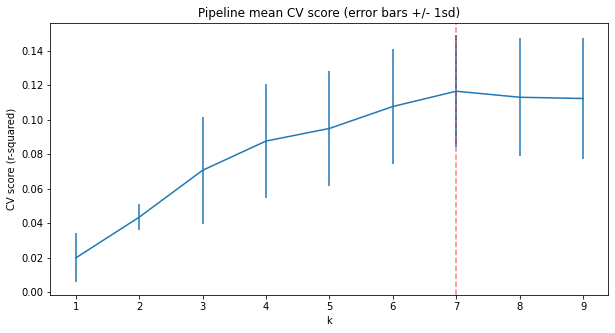

In [80]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [81]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [82]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

availability_365                  17.229692
calculated_host_listings_count    17.037474
longitude                         14.289071
id                                11.273940
number_of_reviews                  0.233856
minimum_nights                   -18.615050
reviews_per_month                -30.424630
dtype: float64

In [83]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [84]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train ,y_train, cv=5)

In [85]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.23589406, 0.07754849, 0.20849864, 0.18508049, 0.07153072])

In [86]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.15571047770285956, 0.06822627412037499)

In [87]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(copy=True, with_mean=True, with_std=True),
  None],
 'simpleimputer__strategy': ['mean', 'median']}

In [88]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe,param_grid=grid_params, cv=5, n_jobs=-1)

In [89]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                           

In [90]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.2406743 , 0.11111795, 0.21123497, 0.18367604, 0.06130035])

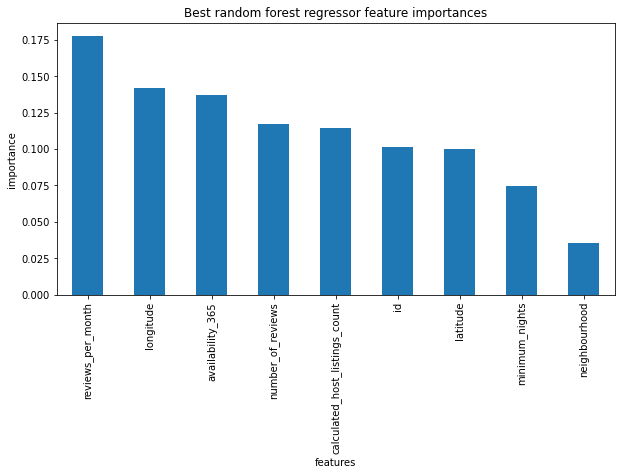

In [91]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [92]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [93]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(78.41284156823316, 7.673149077331455)

In [94]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

84.75977341816773

In [95]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [96]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(72.86991621239937, 6.236203544123168)

In [97]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

76.85647039999999

In [98]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

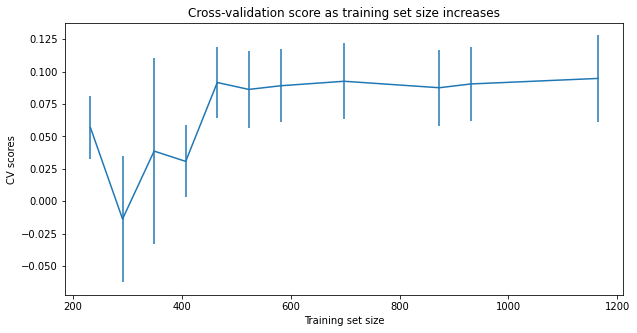

In [99]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [100]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()
    
modelpath = 'C:/Users/Mohammad/DataScienceCapstone/models'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
skimodel_path = os.path.join(modelpath, 'Airbnb_pricing_model.pkl')
if not os.path.exists(skimodel_path):
    with open(skimodel_path, 'wb') as f:
        pickle.dump(best_model, f)